<a href="https://colab.research.google.com/github/anderav1/cs4300-neural-network/blob/main/Project_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
from google.colab import files
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sb
import tensorflow as tf

%matplotlib inline
np.set_printoptions(precision = 2)
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

# Import Data & Create Datasets

In [ ]:
uploaded = files.upload()

Saving cmc.csv to cmc (2).csv


In [ ]:
data = pd.read_csv('cmc.csv', delimiter=',')
data.describe()

,wifeEducation,husbandEducation,numChildren,wifeReligion,wifeWorking,husbandOccupation,SOLIndex,mediaExposure,contraceptiveMethod,wifeAge
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891,32.538357
std,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376,8.227245
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,16.000000
25%,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000,26.000000
50%,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,32.000000
75%,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000,39.000000
max,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000,49.000000


In [ ]:
dataset = np.genfromtxt('cmc.csv', delimiter=',', skip_header = True)
print(dataset.shape)
print(dataset[:5])

(1473, 10)
[[ 2.0  3.0  3.0  1.0  1.0  2.0  3.0  0.0  1.0  24.0]
 [ 1.0  3.0  10.0  1.0  1.0  3.0  4.0  0.0  1.0  45.0]
 [ 2.0  3.0  7.0  1.0  1.0  3.0  4.0  0.0  1.0  43.0]
 [ 3.0  2.0  9.0  1.0  1.0  3.0  3.0  0.0  1.0  42.0]
 [ 3.0  3.0  8.0  1.0  1.0  3.0  2.0  0.0  1.0  36.0]]


In [ ]:
# get mean value of output column
threshold = dataset[:, -1].mean()
print(threshold)

32.53835709436524


In [ ]:
# binarize output column according to mean value
dataset[dataset[:, -1] < threshold, -1] = 0
dataset[dataset[:, -1] >= threshold, -1] = 1

In [ ]:
print(dataset.shape)
print(dataset[:5])

(1473, 10)
[[ 2.0  3.0  3.0  1.0  1.0  2.0  3.0  0.0  1.0  0.0]
 [ 1.0  3.0  10.0  1.0  1.0  3.0  4.0  0.0  1.0  1.0]
 [ 2.0  3.0  7.0  1.0  1.0  3.0  4.0  0.0  1.0  1.0]
 [ 3.0  2.0  9.0  1.0  1.0  3.0  3.0  0.0  1.0  1.0]
 [ 3.0  3.0  8.0  1.0  1.0  3.0  2.0  0.0  1.0  1.0]]


In [ ]:
# shuffle dataset rows
np.random.shuffle(dataset)
print(dataset.shape)
print(dataset[:5])

(1473, 10)
[[ 1.0  0.7 -1.0 -2.4 -1.8 -1.3 -0.1 -0.3  1.2  0.0]
 [ 0.0 -0.5 -0.1  0.4  0.6  1.0 -0.1 -0.3  1.2  1.0]
 [ 0.0 -0.5 -1.0  0.4 -1.8  1.0  0.9 -0.3 -1.0  0.0]
 [ 1.0  0.7 -0.1 -2.4 -1.8 -1.3  0.9 -0.3  0.1  1.0]
 [ 0.0 -0.5  0.3  0.4 -1.8  1.0 -1.1 -0.3  1.2  0.0]]


In [ ]:
# split into training and validation sets
index_30pc = int(0.3 * len(dataset[:, 0]))

# training set
XTRAIN = dataset[index_30pc:, :-1]
YTRAIN = dataset[index_30pc:, -1]

# validation set
XVALID = dataset[:index_30pc, :-1]
YVALID = dataset[:index_30pc, -1]

print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALID.shape)
print(YVALID.shape)

(1032, 9)
(1032,)
(441, 9)
(441,)


# Input Visualization

In [ ]:
columns = ['wifeEducation', 'husbandEducation', 'numChildren', 'wifeReligion', 'wifeWorking', 'husbandOccupation', 'SOLIndex', 'mediaExposure', 'contraceptiveMethod']
cols_length = len(columns)

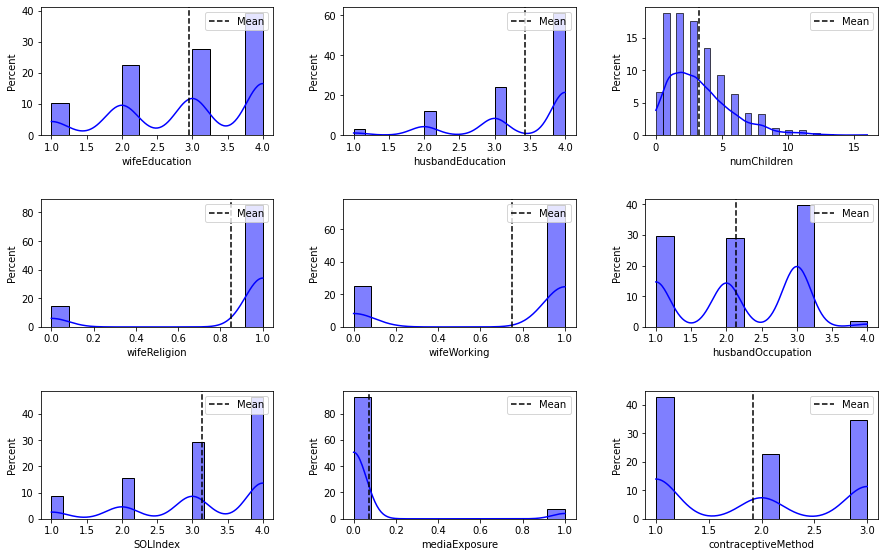

In [ ]:
plt.figure(figsize=(15, 20))
attrib4_ind = [0, 1, 5, 6] # attributes with 4 possible values
attrib2_ind = [3, 4, 7] # attributes with 2 possible values
attrib_int_ind = [2]

for i, j in it.zip_longest(columns, range(cols_length)):
  plt.subplot(6, 3, j+1)
  sb.histplot(data[i], stat="percent", color="blue", kde=True)
  #plt.title(i)
  plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
  plt.axvline(data[i].mean(), color="black", linestyle="dashed", label="Mean")
  plt.legend(loc="upper right")

# Output Distribution

Text(0.5, 1.0, 'Output Distribution')

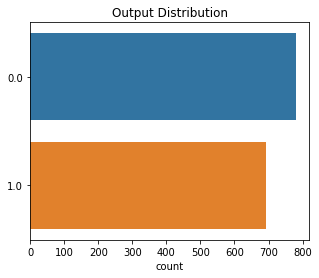

In [ ]:
plt.figure(figsize=(5,4))
axs = sb.countplot(y=dataset[:, -1])
plt.title("Output Distribution")

# Data Normalization

In [ ]:
# standardization
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
XVALID -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID /= std

# rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

# Build Neural Network Model

In [ ]:
# define vars and functions
verb = 1  # verbosity
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1)
mc = ModelCheckpoint('bestmodel.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only = True)
#mc2 = ModelCheckpoint('bestmodel2.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only = True)

In [ ]:
# Plot learning curve
def plot_learning_curve(history):
  plt.figure(figsize = (15, 5))
  plt.suptitle('Learning Curve', fontsize = 20)

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy', fontsize = 14)
  plt.xlabel('Epoch', fontsize = 12)
  plt.legend(['Training data', 'Validation data'], loc='center right')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss', fontsize = 14)
  plt.xlabel('Epoch', fontsize = 12)
  plt.legend(['Training data', 'Validation data'], loc='center right')

  plt.show()

In [ ]:
def compare_predictions(model):
  print('Actual training data:')
  print(YTRAIN[:10])

  prediction_t = model.predict(XTRAIN).round()
  print('Predicted training data')
  print(prediction_t[0:10].T[0])

  print('Actual validation data:')
  print(YVALID[:10])

  prediction_v = model.predict(XVALID).round()
  print('Predicted validation data:')
  print(prediction_v[0:10].T[0])

  return prediction_t, prediction_v

In [ ]:
def eval_model(title, prediction_t, prediction_v):
  accuracy_t = accuracy_score(YTRAIN, prediction_t)
  precision_t = precision_score(YTRAIN, prediction_t)
  recall_t = recall_score(YTRAIN, prediction_t)
  f1_t = f1_score(YTRAIN, prediction_t)

  accuracy_v = accuracy_score(YVALID, prediction_v)
  precision_v = precision_score(YVALID, prediction_v)
  recall_v = recall_score(YVALID, prediction_v)
  f1_v = f1_score(YVALID, prediction_v)

  print("--%s Evaluation--" % title)
  print("Training Set")
  print("Accuracy: %.2f%%" % (accuracy_t * 100.0))
  print("Precision: %.2f%%" % (precision_t * 100.0))
  print("Recall: %.2f%%" % (recall_t * 100.0))
  print("F1-score: %.2f" % (f1_t))
  print('')
  print("Validation Set")
  print("Accuracy: %.2f%%" % (accuracy_v * 100.0))
  print("Precision: %.2f%%" % (precision_v * 100.0))
  print("Recall: %.2f%%" % (recall_v * 100.0))
  print("F1-score: %.2f" % (f1_v))

In [ ]:
# plot ROC curve
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, label='AUC: %.3f' % auc(fpr, tpr), color='red')
  plt.plot([0,1], [0,1], color='darkgreen', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', fontsize=20)
  plt.legend()
  plt.show()

## Base Model

In [ ]:
# start with base model with 1 layer
model_base = Sequential()
model_base.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation = 'sigmoid'))

In [ ]:
model_base.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_base = model_base.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb)

Epoch 1/200
33/33 [==============================] - 1s 7ms/step - loss: 0.8795 - accuracy: 0.4535 - val_loss: 0.8886 - val_accuracy: 0.4331
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8568 - accuracy: 0.4593 - val_loss: 0.8644 - val_accuracy: 0.4490
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8354 - accuracy: 0.4719 - val_loss: 0.8426 - val_accuracy: 0.4558
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.4729 - val_loss: 0.8223 - val_accuracy: 0.4717
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7973 - accuracy: 0.4748 - val_loss: 0.8030 - val_accuracy: 0.4807
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7798 - accuracy: 0.4826 - val_loss: 0.7849 - val_accuracy: 0.4966
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7633 - accuracy: 0.4961 - val_loss: 0.7671 - val_accuracy: 0.5011
Epoch 8/200
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model_base)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Base Model', prediction_t, prediction_v)

--Base Model Evaluation--
Training Set
Accuracy: 75.48%
Precision: 76.07%
Recall: 71.63%
F1-score: 0.74

Validation Set
Accuracy: 80.05%
Precision: 77.00%
Recall: 78.57%
F1-score: 0.78


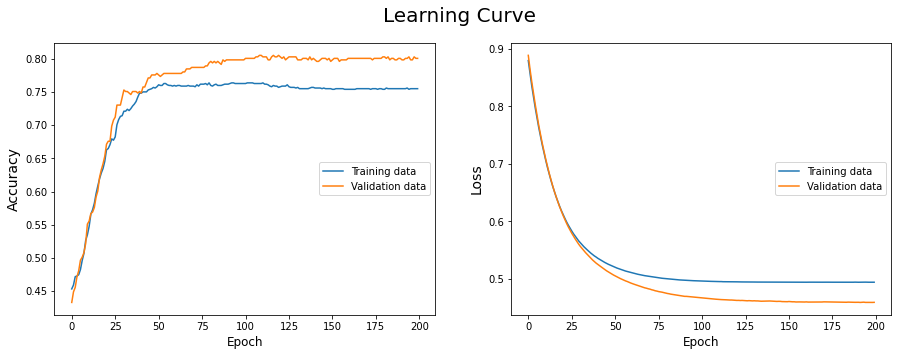

In [ ]:
plot_learning_curve(history_base)

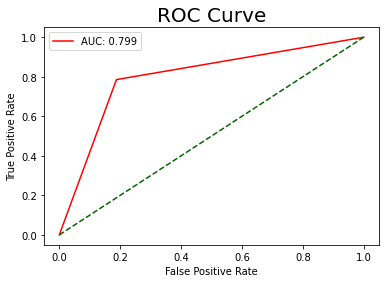

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

## Expanded Models

### (2, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb)

Epoch 1/200
33/33 [==============================] - 1s 7ms/step - loss: 0.7745 - accuracy: 0.4419 - val_loss: 0.7702 - val_accuracy: 0.4444
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7482 - accuracy: 0.4632 - val_loss: 0.7467 - val_accuracy: 0.4535
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7271 - accuracy: 0.4845 - val_loss: 0.7285 - val_accuracy: 0.4649
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.4952 - val_loss: 0.7146 - val_accuracy: 0.4830
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5078 - val_loss: 0.7024 - val_accuracy: 0.4943
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5107 - val_loss: 0.6918 - val_accuracy: 0.5057
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5901 - val_loss: 0.6820 - val_accuracy: 0.6327
Epoch 8/200
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Model (2,1)', prediction_t, prediction_v)

--Model (2,1) Evaluation--
Training Set
Accuracy: 75.78%
Precision: 76.56%
Recall: 71.63%
F1-score: 0.74

Validation Set
Accuracy: 76.64%
Precision: 74.35%
Recall: 72.45%
F1-score: 0.73


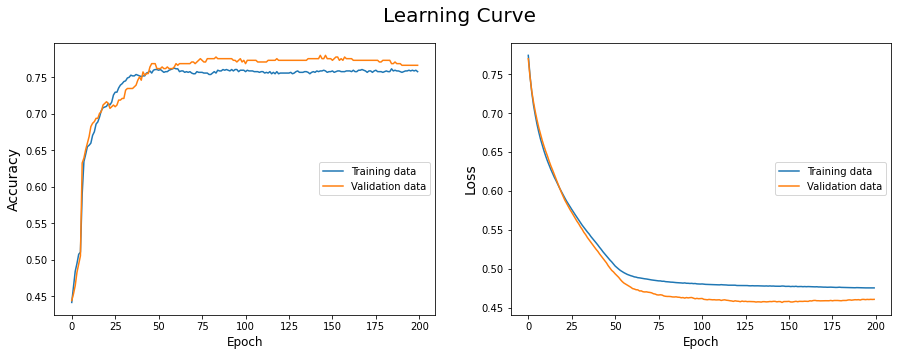

In [ ]:
plot_learning_curve(history)

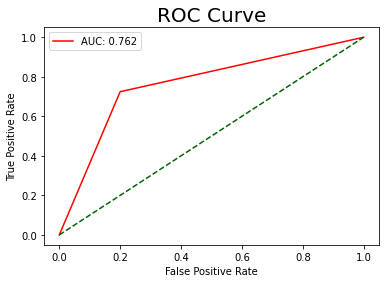

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### (4, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 150, verbose = verb)

Epoch 1/150
33/33 [==============================] - 1s 7ms/step - loss: 0.7763 - accuracy: 0.5155 - val_loss: 0.7692 - val_accuracy: 0.4989
Epoch 2/150
33/33 [==============================] - 0s 3ms/step - loss: 0.7454 - accuracy: 0.5368 - val_loss: 0.7436 - val_accuracy: 0.5374
Epoch 3/150
33/33 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.5620 - val_loss: 0.7199 - val_accuracy: 0.5624
Epoch 4/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5872 - val_loss: 0.6987 - val_accuracy: 0.6009
Epoch 5/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6076 - val_loss: 0.6796 - val_accuracy: 0.6032
Epoch 6/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.6395 - val_loss: 0.6623 - val_accuracy: 0.6213
Epoch 7/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6579 - val_loss: 0.6456 - val_accuracy: 0.6440
Epoch 8/150
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Model (4,1)', prediction_t, prediction_v)

--Model (4,1) Evaluation--
Training Set
Accuracy: 77.23%
Precision: 75.10%
Recall: 78.87%
F1-score: 0.77

Validation Set
Accuracy: 75.51%
Precision: 69.82%
Recall: 79.08%
F1-score: 0.74


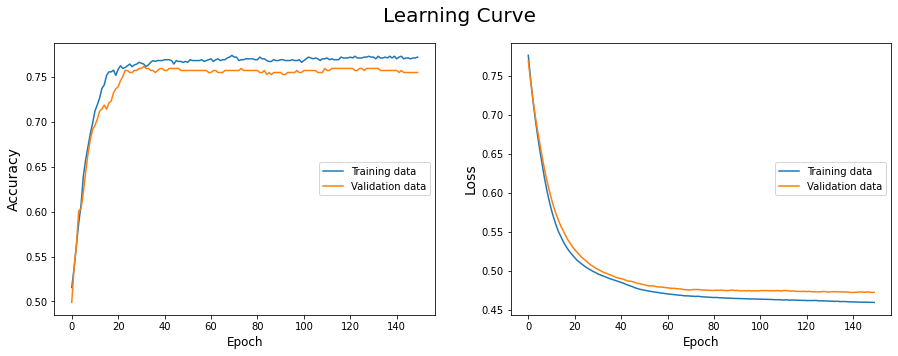

In [ ]:
plot_learning_curve(history)

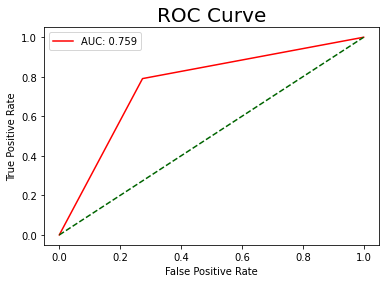

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### (6, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 150, verbose = verb)

Epoch 1/150
33/33 [==============================] - 1s 8ms/step - loss: 0.8549 - accuracy: 0.3556 - val_loss: 0.8312 - val_accuracy: 0.3696
Epoch 2/150
33/33 [==============================] - 0s 3ms/step - loss: 0.8181 - accuracy: 0.3711 - val_loss: 0.7980 - val_accuracy: 0.3900
Epoch 3/150
33/33 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.3895 - val_loss: 0.7699 - val_accuracy: 0.4104
Epoch 4/150
33/33 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.4215 - val_loss: 0.7456 - val_accuracy: 0.4240
Epoch 5/150
33/33 [==============================] - 0s 3ms/step - loss: 0.7373 - accuracy: 0.4554 - val_loss: 0.7242 - val_accuracy: 0.4558
Epoch 6/150
33/33 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.4952 - val_loss: 0.7052 - val_accuracy: 0.4921
Epoch 7/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5291 - val_loss: 0.6880 - val_accuracy: 0.5397
Epoch 8/150
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Model (6,1)', prediction_t, prediction_v)

--Model (6,1) Evaluation--
Training Set
Accuracy: 78.39%
Precision: 77.96%
Recall: 76.86%
F1-score: 0.77

Validation Set
Accuracy: 78.23%
Precision: 75.51%
Recall: 75.51%
F1-score: 0.76


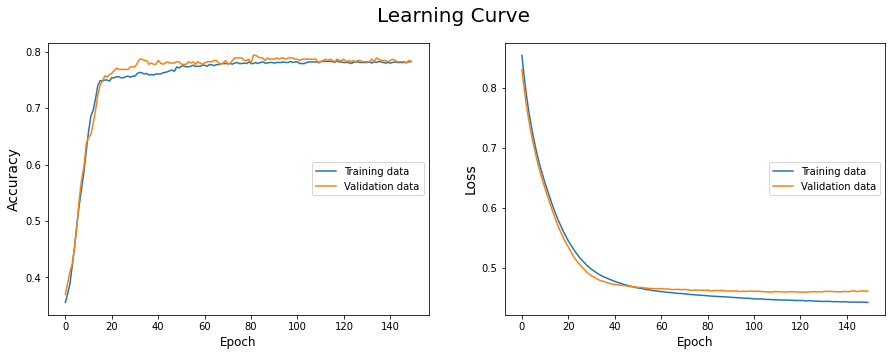

In [ ]:
plot_learning_curve(history)

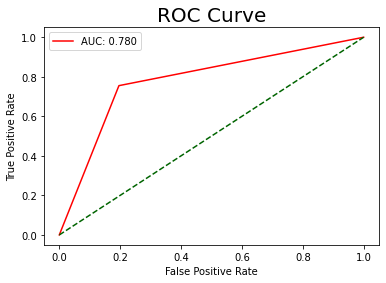

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### (8, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 150, verbose = verb)

Epoch 1/150
33/33 [==============================] - 1s 7ms/step - loss: 0.6781 - accuracy: 0.6114 - val_loss: 0.6730 - val_accuracy: 0.6508
Epoch 2/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6357 - val_loss: 0.6496 - val_accuracy: 0.6576
Epoch 3/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6579 - val_loss: 0.6297 - val_accuracy: 0.6803
Epoch 4/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.6676 - val_loss: 0.6109 - val_accuracy: 0.6848
Epoch 5/150
33/33 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.6860 - val_loss: 0.5945 - val_accuracy: 0.6893
Epoch 6/150
33/33 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6967 - val_loss: 0.5801 - val_accuracy: 0.6939
Epoch 7/150
33/33 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7112 - val_loss: 0.5685 - val_accuracy: 0.7143
Epoch 8/150
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Model (8,1)', prediction_t, prediction_v)

--Model (8,1) Evaluation--
Training Set
Accuracy: 79.65%
Precision: 79.83%
Recall: 77.26%
F1-score: 0.79

Validation Set
Accuracy: 79.14%
Precision: 76.26%
Recall: 77.04%
F1-score: 0.77


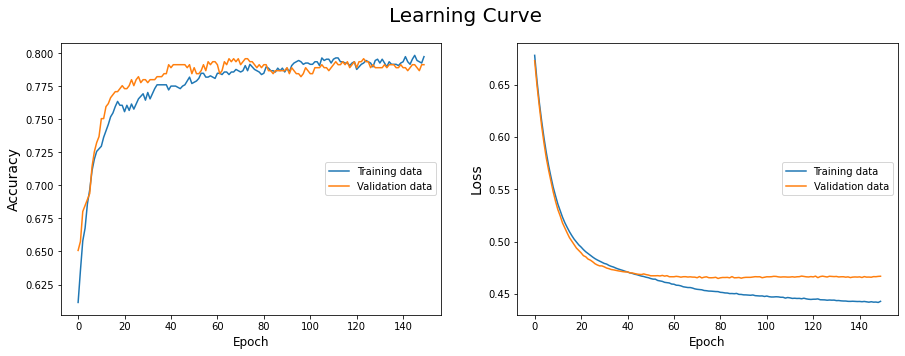

In [ ]:
plot_learning_curve(history)

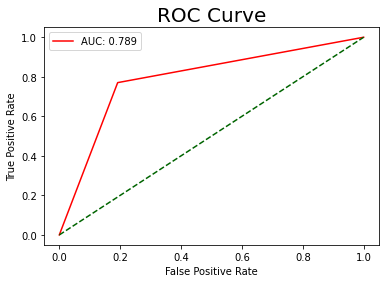

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### (2, 2, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 250, verbose = verb)

Epoch 1/250
33/33 [==============================] - 1s 7ms/step - loss: 0.7472 - accuracy: 0.4787 - val_loss: 0.7595 - val_accuracy: 0.4966
Epoch 2/250
33/33 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.4961 - val_loss: 0.7391 - val_accuracy: 0.5079
Epoch 3/250
33/33 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.5097 - val_loss: 0.7242 - val_accuracy: 0.5193
Epoch 4/250
33/33 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5281 - val_loss: 0.7127 - val_accuracy: 0.5374
Epoch 5/250
33/33 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5436 - val_loss: 0.7034 - val_accuracy: 0.5488
Epoch 6/250
33/33 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5436 - val_loss: 0.6955 - val_accuracy: 0.5714
Epoch 7/250
33/33 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5514 - val_loss: 0.6891 - val_accuracy: 0.5601
Epoch 8/250
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Model (2,2,1)', prediction_t, prediction_v)

--Model (2,2,1) Evaluation--
Training Set
Accuracy: 77.91%
Precision: 75.14%
Recall: 80.89%
F1-score: 0.78

Validation Set
Accuracy: 74.83%
Precision: 68.89%
Recall: 79.08%
F1-score: 0.74


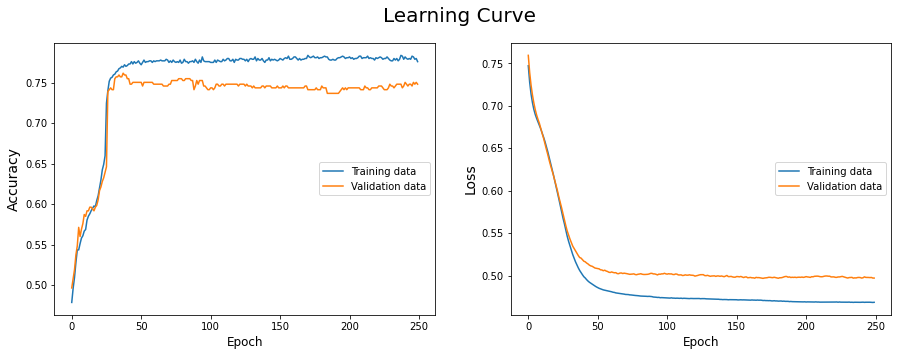

In [ ]:
plot_learning_curve(history)

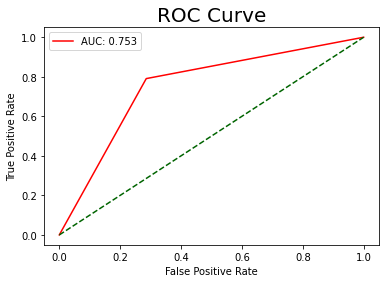

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### (4, 2, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb)

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

In [ ]:
eval_model('Model (4,2,1)', prediction_t, prediction_v)

In [ ]:
plot_learning_curve(history)

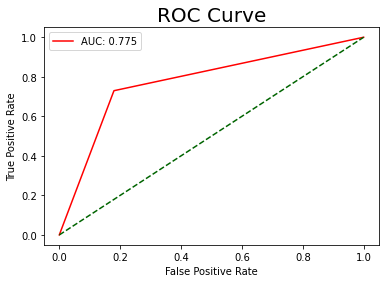

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### (8, 2, 1) Model

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb)

Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 0.7475 - accuracy: 0.4554 - val_loss: 0.7535 - val_accuracy: 0.4512
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7258 - accuracy: 0.4797 - val_loss: 0.7334 - val_accuracy: 0.4717
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.5058 - val_loss: 0.7195 - val_accuracy: 0.4921
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5281 - val_loss: 0.7087 - val_accuracy: 0.5011
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5252 - val_loss: 0.7015 - val_accuracy: 0.5215
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5388 - val_loss: 0.6958 - val_accuracy: 0.5329
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5494 - val_loss: 0.6920 - val_accuracy: 0.5465
Epoch 8/200
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Model (8,2,1)', prediction_t, prediction_v)

--Model (8,2,1) Evaluation--
Training Set
Accuracy: 78.97%
Precision: 78.00%
Recall: 78.47%
F1-score: 0.78

Validation Set
Accuracy: 78.23%
Precision: 75.77%
Recall: 75.00%
F1-score: 0.75


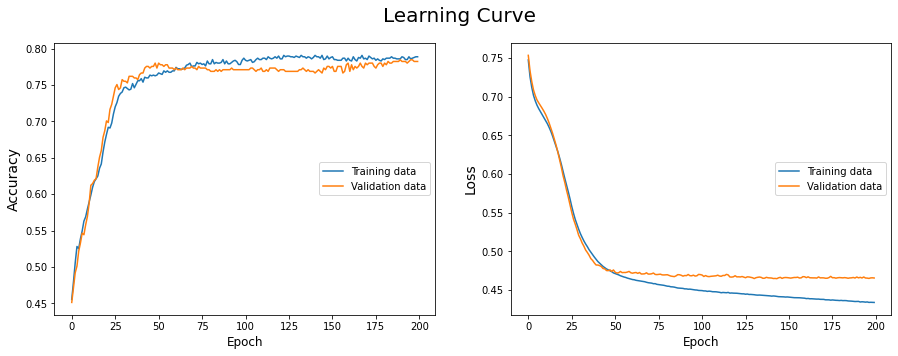

In [ ]:
plot_learning_curve(history)

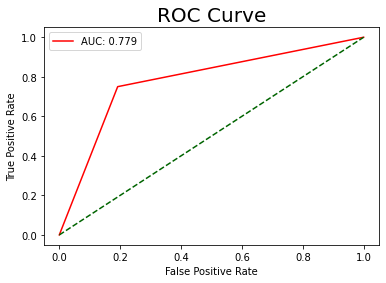

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

## Overfit Model

In [ ]:
model_overfit = Sequential()
model_overfit.add(Dense(200, input_dim = len(XTRAIN[0, :]), activation='relu'))
model_overfit.add(Dense(200, activation = 'relu'))
model_overfit.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_overfit.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history_overfit = model_overfit.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb)

Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 0.5390 - accuracy: 0.7345 - val_loss: 0.4849 - val_accuracy: 0.7642
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7762 - val_loss: 0.4570 - val_accuracy: 0.7823
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7762 - val_loss: 0.4575 - val_accuracy: 0.7982
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7762 - val_loss: 0.4670 - val_accuracy: 0.7732
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.7829 - val_loss: 0.4544 - val_accuracy: 0.7846
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.7907 - val_loss: 0.4746 - val_accuracy: 0.7687
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.7859 - val_loss: 0.4691 - val_accuracy: 0.7664
Epoch 8/200
3

In [ ]:
prediction_t, prediction_v = compare_predictions(model_overfit)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0]


In [ ]:
eval_model('Overfit Model', prediction_t, prediction_v)

--Overfit Model Evaluation--
Training Set
Accuracy: 93.99%
Precision: 91.59%
Recall: 96.38%
F1-score: 0.94

Validation Set
Accuracy: 72.34%
Precision: 67.29%
Recall: 73.47%
F1-score: 0.70


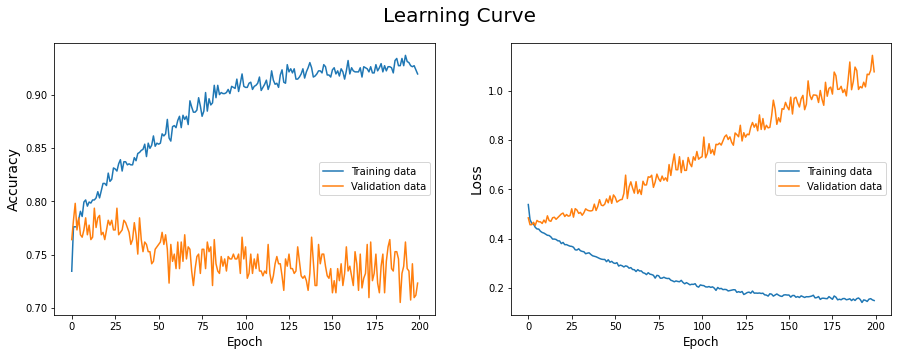

In [ ]:
plot_learning_curve(history_overfit)

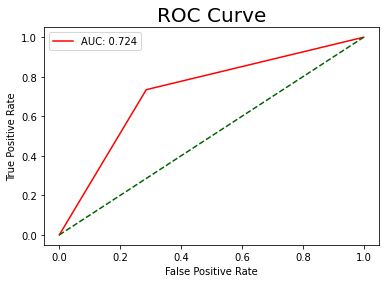

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

## Checkpointing & Early Stopping

The previous overfit model was used to demonstrate the effects of checkpointing and early stopping.

### Overfit Model with Checkpointing

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 250, verbose = verb, callbacks=[mc])

Epoch 1/250
19/33 [================>.............] - ETA: 0s - loss: 0.6010 - accuracy: 0.6941 
Epoch 1: val_accuracy did not improve from 0.79592
33/33 [==============================] - 1s 10ms/step - loss: 0.5643 - accuracy: 0.7277 - val_loss: 0.4899 - val_accuracy: 0.7574
Epoch 2/250
21/33 [==================>...........] - ETA: 0s - loss: 0.4919 - accuracy: 0.7619
Epoch 2: val_accuracy did not improve from 0.79592
33/33 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7548 - val_loss: 0.4569 - val_accuracy: 0.7891
Epoch 3/250
22/33 [===================>..........] - ETA: 0s - loss: 0.4696 - accuracy: 0.7741
Epoch 3: val_accuracy did not improve from 0.79592
33/33 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.7752 - val_loss: 0.4624 - val_accuracy: 0.7778
Epoch 4/250
21/33 [==================>...........] - ETA: 0s - loss: 0.4380 - accuracy: 0.8051
Epoch 4: val_accuracy did not improve from 0.79592
33/33 [====================

In [ ]:
model = load_model('bestmodel.h5')

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Checkpointing', prediction_t, prediction_v)

--Checkpointing Evaluation--
Training Set
Accuracy: 79.07%
Precision: 77.50%
Recall: 79.68%
F1-score: 0.79

Validation Set
Accuracy: 79.59%
Precision: 76.24%
Recall: 78.57%
F1-score: 0.77


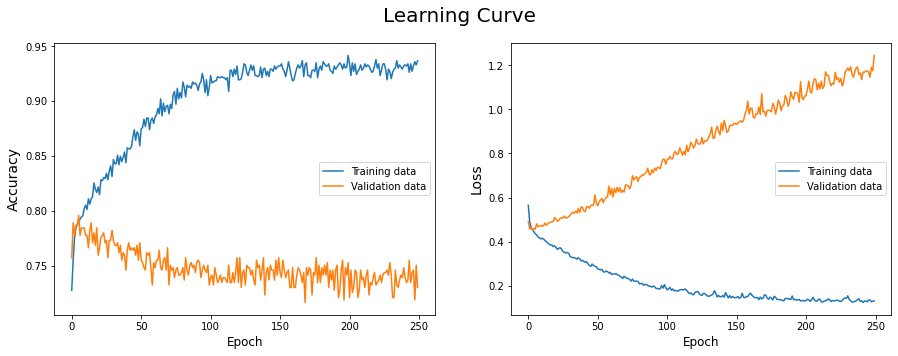

In [ ]:
plot_learning_curve(history)

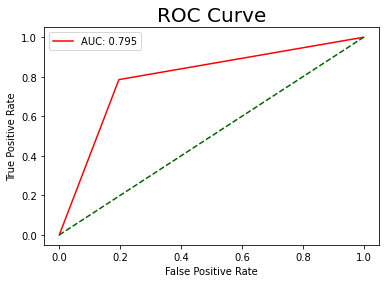

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### Overfit Model with Early Stopping

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb, callbacks=[es])

Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 0.5398 - accuracy: 0.7384 - val_loss: 0.4893 - val_accuracy: 0.7710
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.7733 - val_loss: 0.4603 - val_accuracy: 0.8005
Epoch 2: early stopping


In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Early Stopping', prediction_t, prediction_v)

--Early Stopping Evaluation--
Training Set
Accuracy: 78.88%
Precision: 77.84%
Recall: 78.47%
F1-score: 0.78

Validation Set
Accuracy: 80.05%
Precision: 77.00%
Recall: 78.57%
F1-score: 0.78


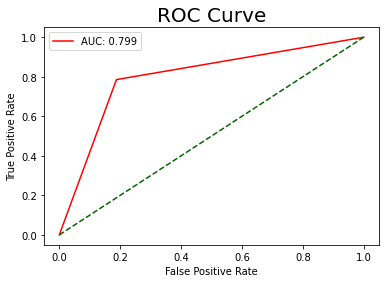

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)

### Overfit Model with Early Stopping & Checkpointing

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(x = XTRAIN, y = YTRAIN, validation_data = (XVALID, YVALID), epochs = 200, verbose = verb, callbacks=[es,mc])

Epoch 1/200
22/33 [===================>..........] - ETA: 0s - loss: 0.5561 - accuracy: 0.7344 
Epoch 1: val_accuracy did not improve from 0.79592
33/33 [==============================] - 1s 8ms/step - loss: 0.5368 - accuracy: 0.7422 - val_loss: 0.4766 - val_accuracy: 0.7596
Epoch 2/200
24/33 [====================>.........] - ETA: 0s - loss: 0.4716 - accuracy: 0.7786
Epoch 2: val_accuracy did not improve from 0.79592
33/33 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7733 - val_loss: 0.4604 - val_accuracy: 0.7823
Epoch 2: early stopping


In [ ]:
model = load_model('bestmodel.h5')

In [ ]:
prediction_t, prediction_v = compare_predictions(model)

Actual training data:
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0]
Predicted training data
[ 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0]
Actual validation data:
[ 0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]
Predicted validation data:
[ 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0]


In [ ]:
eval_model('Early Stopping & Checkpointing', prediction_t, prediction_v)

--Early Stopping & Checkpointing Evaluation--
Training Set
Accuracy: 79.07%
Precision: 77.50%
Recall: 79.68%
F1-score: 0.79

Validation Set
Accuracy: 79.59%
Precision: 76.24%
Recall: 78.57%
F1-score: 0.77


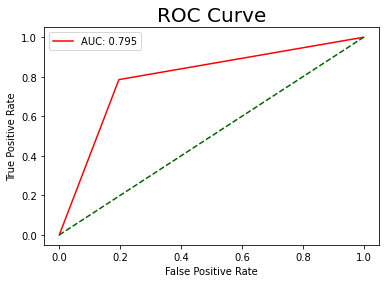

In [ ]:
# plot model's ROC curve for positive classifications
fpr, tpr, thresholds = roc_curve(YVALID, prediction_v)
plot_roc_curve(fpr, tpr)